<a href="https://colab.research.google.com/github/Tamanna-Git/Data-Science-Projects/blob/main/Task2/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Market prediction & Forecasting using stacked LSTM**

Import the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


Summarize the data

In [5]:
df = df[::-1]
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


Remove Duplicate entries in dataset

In [8]:
df.drop_duplicates(inplace = True)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


Visualization of dataset

<ipython-input-9-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


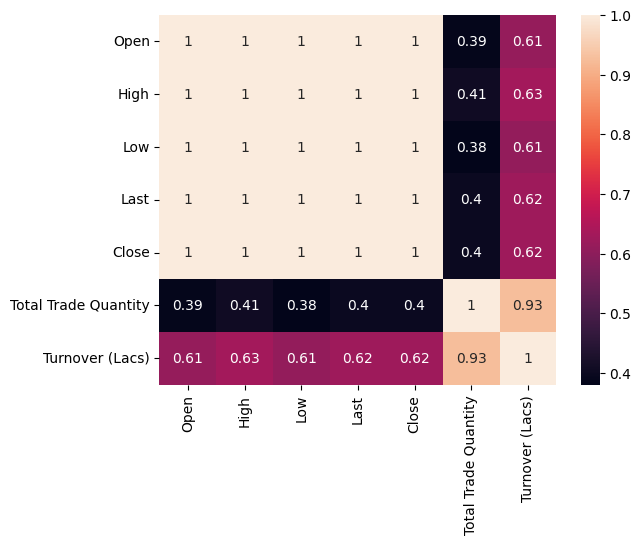

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
df_high = df.reset_index()['High']

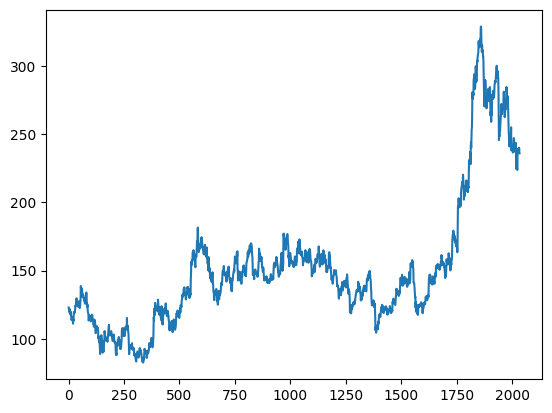

In [11]:
plt.plot(df_high)
plt.show()

Preprocessing

In [12]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()
df_high = MMS.fit_transform(df_high.values.reshape(-1,1))
df_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

Split the dataset for train & test

In [13]:
train_size = int(len(df_high)*0.8)
test_size = len(df_high) - train_size

train_size,test_size

(1628, 407)

In [14]:
train_data,test_data = df_high[:train_size,:],df_high[train_size:,:1]
train_data.shape

(1628, 1)

Preparing data

In [15]:
def create_data(data,time_step):
  X_data,y_data =[],[]
  for i in range(len(data)-time_step-1):
    prev = data[i:i+time_step,0]
    X_data.append(prev)
    y_data.append(data[i+time_step,0])
  return np.array(X_data),np.array(y_data)

In [16]:
time_step = 100

X_train, y_train = create_data(train_data, time_step)
X_test, y_test = create_data(test_data, time_step)

In [17]:
# Make 3-D data(LSTM Requirement) (samples, time steps, features)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape, y_train.shape

((1527, 100, 1), (1527,))

Model Building

In [18]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Prediction

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = True)

Epoch 1/100
24/24 [==============================] - 25s 472ms/step - loss: 0.0094 - val_loss: 0.0364
Epoch 2/100
24/24 [==============================] - 10s 438ms/step - loss: 0.0017 - val_loss: 0.0096
Epoch 3/100
24/24 [==============================] - 13s 564ms/step - loss: 8.7580e-04 - val_loss: 0.0045
Epoch 4/100
24/24 [==============================] - 10s 420ms/step - loss: 8.0995e-04 - val_loss: 0.0057
Epoch 5/100
24/24 [==============================] - 10s 394ms/step - loss: 8.0530e-04 - val_loss: 0.0041
Epoch 6/100
24/24 [==============================] - 10s 435ms/step - loss: 7.9152e-04 - val_loss: 0.0044
Epoch 7/100
24/24 [==============================] - 11s 442ms/step - loss: 7.3266e-04 - val_loss: 0.0066
Epoch 8/100
24/24 [==============================] - 9s 383ms/step - loss: 7.0623e-04 - val_loss: 0.0067
Epoch 9/100
24/24 [==============================] - 13s 534ms/step - loss: 7.0241e-04 - val_loss: 0.0043
Epoch 10/100
24/24 [==============================] - 1

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Metrics

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_train = sqrt(mean_squared_error(y_train, train_predict))
rmse_test = sqrt(mean_squared_error(y_test, test_predict))
rmse_train, rmse_test

Plotting

In [ ]:
train_predict = MMS.inverse_transform(train_predict)
test_predict = MMS.inverse_transform(test_predict)

In [ ]:
look_back = 100

trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back: len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df_high)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1: len(df_high) - 1, :] = test_predict

In [ ]:
plt.plot(MMS.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.legend(labels = ['Complete data', 'Train data', 'Predicted data'])
plt.show()